In [17]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models,Sequential,layers

In [8]:
dataset=pd.read_csv('cc_approvals.csv')
columns_names=['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed',
'PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','ApprovalStatus']
dataset.columns=columns_names
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [9]:
def clean_data(dataset):
    dataset['Age']=dataset['Age'].apply(lambda x : None if x=="?"  else x)
    dataset['Gender']=dataset['Gender'].map({'a':0,'b':1,'?':None})
    dataset['Married']=dataset['Married'].map({'u':0,"y":1,"l":2,"?":None})
    dataset['BankCustomer']=dataset['BankCustomer'].map({'g':0,"p":1,"?":None,"gg":2})
    dataset['EducationLevel']=dataset['EducationLevel'].map({'q':0,'w':1,"m":2,'r':3,
                                                        'cc':4,'k':5,"c":6,'d':7,'x':8,
                                                         'i':9,'e':10,'aa':11,"ff":12,'j':13,'?':None })
    dataset['Ethnicity']=dataset['Ethnicity'].map({'h':0,"v":1,'bb':2,'ff':3,'j':4,'z':5,
                                               '?':None,'o':6,'dd':7,'n':8})
    dataset['PriorDefault']=dataset['PriorDefault'].apply(lambda x: 1 if x=='t' else 0 if x=='f' else x)
    dataset['Employed']=dataset['Employed'].apply(lambda x: 1 if x=='t' else 0 if x=='f' else x)
    dataset['DriversLicense']=dataset['DriversLicense'].apply(lambda x: 1 if x=='t' else 0 if x=='f' else x)
    dataset['Citizen']=dataset['Citizen'].apply(lambda x: 1 if x=='g' else 0 if x=='s' else 2 if x=='p' else x)
    dataset['ZipCode']=dataset['ZipCode'].apply(lambda x: None if x =="?" else x)
    dataset['ApprovalStatus']=dataset['ApprovalStatus'].apply(lambda x: 1 if x=='+' else 0 if x=='-' else x)
    return dataset

    
dataset=clean_data(dataset)


In [10]:
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,0.0,58.67,4.460,0.0,0.0,0.0,0.0,3.04,1,1,6,0,1,00043,560,1
1,0.0,24.50,0.500,0.0,0.0,0.0,0.0,1.50,1,0,0,0,1,00280,824,1
2,1.0,27.83,1.540,0.0,0.0,1.0,1.0,3.75,1,1,5,1,1,00100,3,1
3,1.0,20.17,5.625,0.0,0.0,1.0,1.0,1.71,1,0,0,0,0,00120,0,1
4,1.0,32.08,4.000,0.0,0.0,2.0,1.0,2.50,1,0,0,1,1,00360,0,1


In [11]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
x=dataset.drop(columns=['ApprovalStatus'],axis=1)
y=dataset['ApprovalStatus']


In [12]:
knn_imputer=KNNImputer(n_neighbors=5)
x=knn_imputer.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,shuffle=True)

In [36]:
model=models.Sequential([
    tf.keras.layers.Dense(128,input_dim=x_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [39]:
history=model.fit(x_train,y_train,epochs=32,batch_size=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/32
1/6 [====>.........................] - ETA: 0s - loss: 1.0034 - accuracy: 0.6200

6/6 [==============================] - 0s 40ms/step - loss: 0.8855 - accuracy: 0.6667 - val_loss: 0.6348 - val_accuracy: 0.6590
Epoch 2/32
6/6 [==============================] - 0s 16ms/step - loss: 0.8831 - accuracy: 0.6880 - val_loss: 0.6376 - val_accuracy: 0.6474
Epoch 3/32
6/6 [==============================] - 0s 10ms/step - loss: 1.0831 - accuracy: 0.6570 - val_loss: 0.6376 - val_accuracy: 0.6416
Epoch 4/32
6/6 [==============================] - 0s 10ms/step - loss: 0.7499 - accuracy: 0.6337 - val_loss: 0.6430 - val_accuracy: 0.6416
Epoch 5/32
6/6 [==============================] - 0s 23ms/step - loss: 0.7906 - accuracy: 0.6415 - val_loss: 0.6374 - val_accuracy: 0.6474
Epoch 6/32
6/6 [==============================] - 0s 19ms/step - loss: 1.0871 - accuracy: 0.6822 - val_loss: 0.6379 - val_accuracy: 0.6590
Epoch 7/32
6/6 [==============================] - 0s 18ms/step - loss: 0.7371 - accuracy: 0.6744 - val_loss: 0.6421 - val_accuracy: 0.6705
Epoch 8/32
6/6 [======================

In [41]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail

<bound method NDFrame.tail of         loss  accuracy  val_loss  val_accuracy  epoch
0   0.885507  0.666667  0.634819      0.658960      0
1   0.883116  0.687984  0.637647      0.647399      1
2   1.083122  0.656977  0.637551      0.641618      2
3   0.749872  0.633721  0.643033      0.641618      3
4   0.790619  0.641473  0.637387      0.647399      4
5   1.087065  0.682171  0.637930      0.658960      5
6   0.737086  0.674419  0.642128      0.670520      6
7   0.661278  0.680233  0.640544      0.664740      7
8   0.795729  0.670543  0.641739      0.641618      8
9   0.934069  0.664729  0.649348      0.630058      9
10  0.849121  0.666667  0.645443      0.635838     10
11  0.821073  0.672481  0.645816      0.635838     11
12  2.919333  0.637597  0.648401      0.624277     12
13  0.802078  0.689922  0.688555      0.641618     13
14  0.761593  0.674419  0.674903      0.635838     14
15  0.746705  0.687984  0.647885      0.653179     15
16  1.028633  0.643411  0.634917      0.653179     1

In [44]:
def plot_loss(history):
    plt.plot(history.history['val_accuracy'],label='loss')
    plt.plot(history.history['accuracy'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

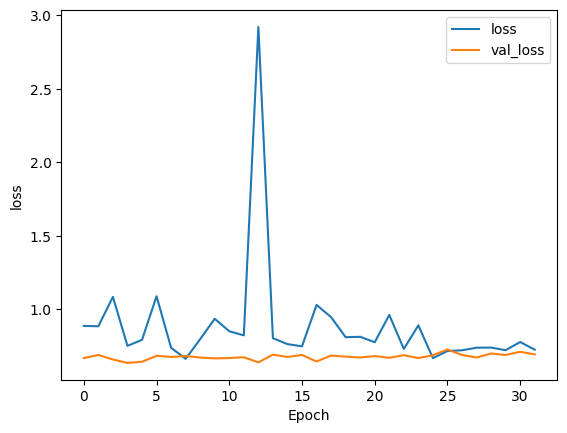

In [45]:
plot_loss(history)